# Store Sales - Time Series Forcasting

# Dataset Description

    In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

# File Descriptions and Data Field Information
1.**train.csv**

The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
* store_nbr: identifies the store at which the products are sold.
* family: identifies the type of product sold.
* sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since  
    products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
* onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

2. **test.csv**

    The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
    The dates in the test data are for the 15 days after the last date in the training data.
    
3. **sample_submission.csv**
    A sample submission file in the correct format.
    
4. **stores.csv** 
 * Store metadata, including city, state, type, and cluster.
 * cluster is a grouping of similar stores.
 
5. **oil.csv**

* Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

6. **holidays_events.csv**

* Holidays and Events, with metadata
* NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
* Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

7. **Additional Notes**
 * Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
 * A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.
 
 # Goal:
      In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

    Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore' )
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18
%matplotlib inline
#Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)


In [2]:
holiday_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\holidays_events.csv")
oil_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\oil.csv")
store_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\stores.csv")
train_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\train.csv")
test_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\test.csv")
transcation_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\transactions.csv")

# EDA on Holiday_dataset

In [4]:
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [3]:
print(f"Total Number Of Rows = {holiday_df.shape[0]} and Columns = {holiday_df.shape[1]}")

Total Number Of Rows = 350 and Columns = 6


In [5]:
# checking duplicated values
holiday_df.duplicated().sum()

0

In [7]:
# Checking null values
holiday_df.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

**Observation**
* There is No Null values is present in Holidays dataset

In [8]:
# checking uniques values in dataframe
holiday_df.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [9]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [10]:
holiday_df['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [15]:
holiday_df['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

<AxesSubplot:>

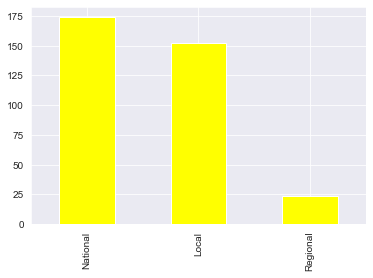

In [14]:
holiday_df['locale'].value_counts().plot(kind='bar', color ='yellow')

**Observation** 
1. There is 3 different types of Location 1). National, 2). Local, 3). Regional
2. There is more number of National Location
3. Regional Location are less which around 24 
4. Local Location is nearly same to National Location which is 152

In [17]:
# Types of event
holiday_df['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

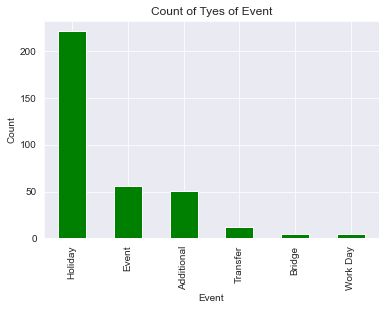

In [18]:
# Types of event and plot
holiday_df['type'].value_counts().plot(kind = "bar", color ='Green')
plt.xlabel("Event")
plt.ylabel("Count")
plt.title("Count of Tyes of Event")
plt.show()

**Observation**
1. There is more Number of Holiday occurs 
2. Event and Additional has same amount of Count values
3. Bride and Work day has least amount of sales and having least count as compare to other

In [19]:
# Location Names 
holiday_df['locale_name'].value_counts()

Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala                             6
Imbabura                            6
Puyo                                6
Libertad                            6
Cayambe                             6
Name: locale_name, dtype: int64

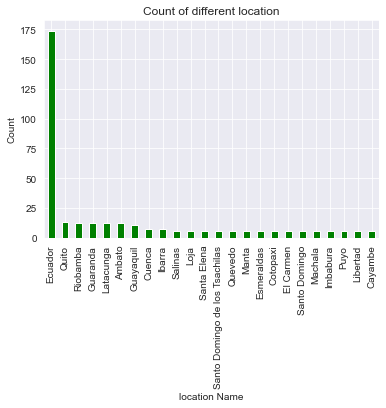

In [20]:
# Types of Location and plot
holiday_df['locale_name'].value_counts().plot(kind = "bar", color ='Green')
plt.xlabel("location Name")
plt.ylabel("Count")
plt.title("Count of different location")
plt.show()

**Observation** 
1. Eculador has Highest no of Counts
2. Other location has almost similar count 